<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [5]:
url = "https://raw.githubusercontent.com/Evelyn0924/Aprendizaje-Automatico-CD/refs/heads/main/Datos/Wholesale%20customers%20data.csv"

# Cargar datos
df = pd.read_csv(url, sep=';')

# Mostrar las primeras filas
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
numeric_cols = [
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicassen'
]

X = df[numeric_cols]

# Descripción estadística
X.describe()



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=numeric_cols).describe()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

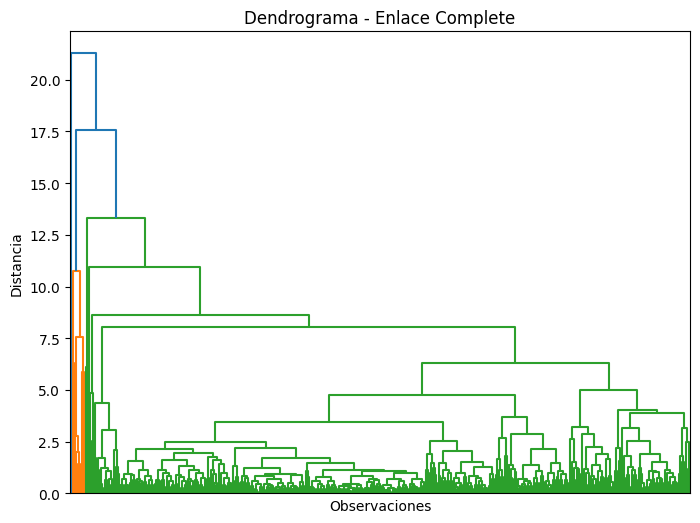

In [20]:

Z = linkage(X_scaled, method='complete')
plt.figure(figsize=(8, 6))
dendrogram(Z, no_labels=True)
plt.title("Dendrograma - Enlace Complete")
plt.ylabel("Distancia")
plt.xlabel("Observaciones")
plt.show()

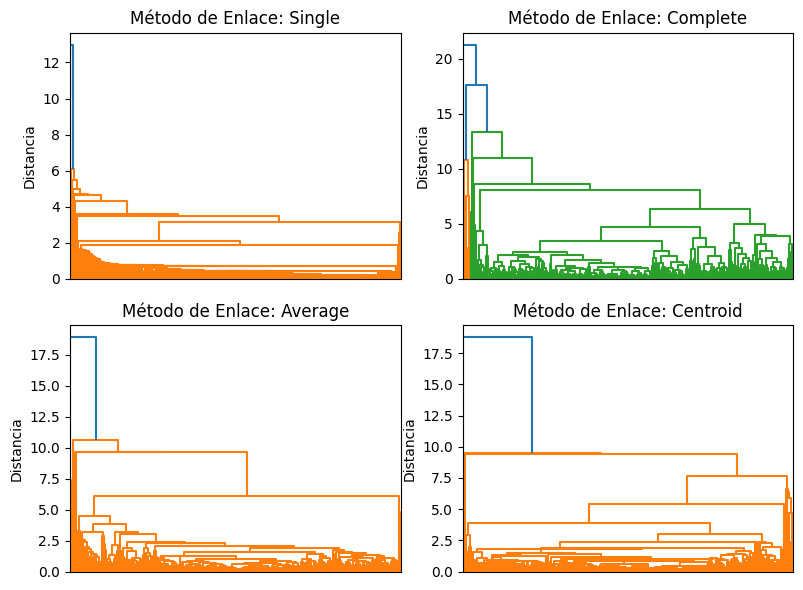

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.ravel()

methods = ['single', 'complete', 'average', 'centroid']

for i, method in enumerate(methods):
    Z = linkage(X_scaled, method=method)
    dendrogram(Z, no_labels=True, ax=axes[i])
    axes[i].set_title(f'Método de Enlace: {method.capitalize()}')
    axes[i].set_ylabel('Distancia')

plt.tight_layout()
plt.show()


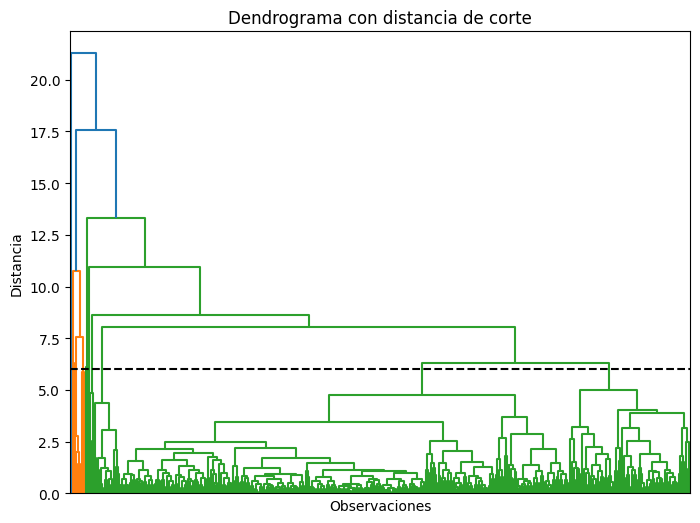

In [22]:
Z = linkage(X_scaled, method='complete')
distancia_corte = 6

plt.figure(figsize=(8, 6))
dendrogram(Z, no_labels=True)
plt.axhline(y=distancia_corte, c='k', ls='--')
plt.title("Dendrograma con distancia de corte")
plt.ylabel("Distancia")
plt.xlabel("Observaciones")
plt.show()


Se utilizó el método de enlace completo porque genera grupos más compactos y separados, evitando el efecto de encadenamiento observado en otros métodos. La distancia de corte se eligió alrededor de 6, ya que en ese punto se observa un salto evidente en la distancia de unión del dendrograma. Este corte permite formar un número razonable de grupos bien diferenciados, sin dividir excesivamente los datos ni agruparlos en un solo clúster.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [23]:
# Asignar clusters según la distancia de corte
clusters = fcluster(Z, t=distancia_corte, criterion='distance')

df['Cluster'] = ['C' + str(c) for c in clusters]

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,C9
1,2,3,7057,9810,9568,1762,3293,1776,C9
2,2,3,6353,8808,7684,2405,3516,7844,C10
3,1,3,13265,1196,4221,6404,507,1788,C9
4,2,3,22615,5410,7198,3915,1777,5185,C9


In [25]:
df.groupby('Cluster')[numeric_cols].mean()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
C1,16117.000000,46197.000000,92780.000000,1026.000000,40827.000000,2944.000000
C10,5685.139535,11014.093023,17054.313953,1546.046512,7465.965116,1747.930233
C11,112151.000000,29627.000000,18148.000000,16745.000000,4948.000000,8550.000000
C12,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000
C2,8565.000000,4980.000000,67298.000000,131.000000,38102.000000,1215.000000
C3,6326.800000,25956.400000,35601.600000,3473.200000,19776.200000,3176.800000
C4,34444.333333,55375.333333,49094.333333,4007.666667,23647.333333,3128.333333
C5,11314.000000,3090.000000,2062.000000,35009.000000,71.000000,2698.000000
C6,32717.000000,16784.000000,13626.000000,60869.000000,1272.000000,5609.000000


In [27]:
df.groupby('Cluster')[numeric_cols].agg(['min', 'max'])


Fresh           Milk        Grocery        Frozen         \
            min     max    min    max     min    max    min    max   
Cluster                                                              
C1        16117   16117  46197  46197   92780  92780   1026   1026   
C10          18   27380   1275  25862    1660  36486     25  10155   
C11      112151  112151  29627  29627   18148  18148  16745  16745   
C12       36847   36847  43950  43950   20170  20170  36534  36534   
C2         8565    8565   4980   4980   67298  67298    131    131   
C3           85   12119  20959  29892   26866  45828     36   6746   
C4        22925   44466  38369  73498   32114  59598    987   7782   
C5        11314   11314   3090   3090    2062   2062  35009  35009   
C6        32717   32717  16784  16784   13626  13626  60869  60869   
C7        18291   43265   1266  36423    8117  22019   5154   6312   
C8        36050   76237    286   6958     471  12609    532  18028   
C9            3   37036     55  16687       3  16966     47  18711   

        Detergents_Paper        Delicassen         
                     min    max        min    max  
Cluster                                            
C1                 40827  40827       2944   2944  
C10                  282  17120          3   7844  
C11                 4948   4948       8550   8550  
C12                  239    239      47943  47943  
C2                 38102  38102       1215   1215  
C3                 17740  24231       1340   5130  
C4                 20070  26701        903   6465  
C5                    71     71       2698   2698  
C6                  1272   1272       5609   5609  
C7                  1579   4337      14351  16523  
C8                    32   2587         18   3321  
C9                     3   5316          3   5864

In [29]:
for cluster in df['Cluster'].unique():
    print(f'Cluster {cluster} - cantidad de elementos: {df[df["Cluster"] == cluster].shape[0]}')
    display(df[df['Cluster'] == cluster].head(5))


Cluster C9 - cantidad de elementos: 318


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,C9
1,2,3,7057,9810,9568,1762,3293,1776,C9
3,1,3,13265,1196,4221,6404,507,1788,C9
4,2,3,22615,5410,7198,3915,1777,5185,C9
5,2,3,9413,8259,5126,666,1795,1451,C9


Cluster C10 - cantidad de elementos: 86


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
2,2,3,6353,8808,7684,2405,3516,7844,C10
9,2,3,6006,11093,18881,1159,7425,2098,C10
10,2,3,3366,5403,12974,4400,5977,1744,C10
13,2,3,21217,6208,14982,3095,6707,602,C10
16,2,3,1020,8816,12121,134,4508,1080,C10


Cluster C7 - cantidad de elementos: 3


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
23,2,3,26373,36423,22019,5154,4337,16523,C7
71,1,3,18291,1266,21042,5373,4173,14472,C7
87,1,3,43265,5025,8117,6312,1579,14351,C7


Cluster C8 - cantidad de elementos: 19


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
29,1,3,43088,2100,2609,1200,1107,823,C8
39,1,3,56159,555,902,10002,212,2916,C8
52,2,3,40721,3916,5876,532,2587,1278,C8
103,1,3,56082,3504,8906,18028,1480,2498,C8
124,1,3,36050,1642,2961,4787,500,1621,C8


Cluster C4 - cantidad de elementos: 3


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
47,2,3,44466,54259,55571,7782,24171,6465,C4
61,2,3,35942,38369,59598,3254,26701,2017,C4
86,2,3,22925,73498,32114,987,20070,903,C4


Cluster C3 - cantidad de elementos: 5


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
56,2,3,4098,29892,26866,2616,17740,1340,C3
65,2,3,85,20959,45828,36,24231,1423,C3
92,2,3,9198,27472,32034,3232,18906,5130,C3
211,2,1,12119,28326,39694,4736,19410,2870,C3
251,2,1,6134,23133,33586,6746,18594,5121,C3


Cluster C1 - cantidad de elementos: 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
85,2,3,16117,46197,92780,1026,40827,2944,C1


Cluster C5 - cantidad de elementos: 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
93,1,3,11314,3090,2062,35009,71,2698,C5


Cluster C11 - cantidad de elementos: 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
181,1,3,112151,29627,18148,16745,4948,8550,C11


Cluster C12 - cantidad de elementos: 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
183,1,3,36847,43950,20170,36534,239,47943,C12


Cluster C6 - cantidad de elementos: 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
325,1,2,32717,16784,13626,60869,1272,5609,C6


Cluster C2 - cantidad de elementos: 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
333,2,2,8565,4980,67298,131,38102,1215,C2


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

## Descripción de los grupos obtenidos

El agrupamiento jerárquico permitió identificar distintos perfiles de clientes según su patrón de gasto anual en las categorías analizadas.

**Cluster C1 - Cliente mayorista de gran volumen**  
Cliente con gastos extremadamente altos en Milk, Grocery y Detergents_Paper, representando un cliente corporativo o mayorista de gran escala.

**Cluster C2 - Mayorista de productos de limpieza y abarrotes**  
Presenta un gasto muy elevado en Grocery y Detergents_Paper, con bajo consumo en Frozen y Delicassen, lo que sugiere un negocio enfocado en productos de consumo masivo.

**Cluster C3 - Cliente mayorista regular**  
Clientes con consumo alto y relativamente balanceado en Milk, Grocery y Detergents_Paper, con valores moderados en el resto de categorías.

**Cluster C4 - Clientes de alto consumo integral**  
Grupo caracterizado por altos niveles de gasto en la mayoría de las categorías, correspondiente a negocios consolidados con alta demanda.

**Cluster C5 - Especialista en productos congelados**  
Cliente con consumo extremadamente alto en Frozen y bajo en el resto de categorías, indicando un negocio altamente especializado.

**Cluster C6 - Distribuidor de congelados mixto**  
Presenta un alto consumo en Frozen acompañado de gastos medios en otras categorías, mostrando un perfil mixto de distribución.

**Cluster C7 - Cliente gourmet**  
Grupo con gasto elevado en Delicassen y consumo medio en las demás categorías, asociado a negocios especializados o gourmet.

**Cluster C8 - Cliente minorista de bajo consumo**  
Clientes con bajos niveles de gasto en todas las categorías, correspondientes a pequeños negocios o clientes ocasionales.

**Cluster C9 - Cliente promedio**  
Grupo con niveles de gasto moderados y balanceados en todas las categorías, representando el comportamiento promedio del conjunto de datos.

**Cluster C10 - Mayorista medio de abarrotes**  
Clientes con consumo medio, principalmente en Grocery y Milk, característicos de negocios de abarrotes de tamaño medio.

**Cluster C11 - Distribuidor de productos frescos**  
Cliente con consumo extremadamente alto en Fresh, asociado a distribuidores de productos frescos.

**Cluster C12 - Cliente especializado premium**  
Cliente con valores muy elevados en Frozen y Delicassen, representando un perfil altamente especializado y de alto valor.


---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster'].values

fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='Cluster',
    title='Visualización 2D de los grupos obtenidos (PCA)'
)

fig.show()

In [34]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  ])

## Visualización 2D de los grupos (PCA)

La visualización en dos dimensiones se realizó utilizando Análisis de Componentes Principales (PCA). En el gráfico se observa que algunos grupos presentan una separación clara, mientras que otros se sobreponen.

La primera componente principal explica aproximadamente el **44.08%** de la varianza total, mientras que la segunda componente explica alrededor del **28.38%**, acumulando un **72.46% de la varianza explicada** en la visualización 2D.

En general, los grupos obtenidos pueden considerarse razonablemente buenos, ya que la mayor parte de la variabilidad de los datos está representada en el plano bidimensional. Sin embargo, el solapamiento observado en algunos grupos indica que parte de la información se pierde al reducir la dimensionalidad, lo cual puede afectar parcialmente la visualización, aunque no invalida la estructura de los clústers obtenidos.


---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [35]:
silhouette_avg = silhouette_score(X_scaled, clusters)

silhouette_avg

np.float64(0.37220200071197435)

## Métrica de la silueta

La métrica de la silueta obtenida para los grupos es de aproximadamente 0.37.

Este valor indica que los clústers presentan una calidad aceptable a buena, con una separación razonable entre los grupos y una coherencia interna adecuada. Aunque existe cierto solapamiento entre algunos clústers, el resultado es consistente con la visualización en 2D obtenida mediante PCA.

En general, los grupos formados pueden considerarse satisfactorios para un análisis exploratorio, ya que reflejan una estructura clara en los datos sin presentar una segmentación aleatoria.


---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

In [36]:
methods = ['single', 'complete', 'average', 'centroid']
distancias_corte = [4, 5, 6, 7]

resultados = []

for method in methods:
    Z_temp = linkage(X_scaled, method=method)
    for d in distancias_corte:
        clusters_temp = fcluster(Z_temp, t=d, criterion='distance')
        # Evitar casos con un solo cluster
        if len(set(clusters_temp)) > 1:
            sil = silhouette_score(X_scaled, clusters_temp)
            resultados.append({
                'Metodo': method,
                'Distancia_corte': d,
                'Silhouette': sil
            })

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

df_resultados

,Metodo,Distancia_corte,Silhouette
0,single,4,0.664957
1,single,5,0.737281
2,single,6,0.796648
3,single,7,0.863801
4,complete,4,0.271837
5,complete,5,0.310365
6,complete,6,0.372202
7,complete,7,0.410667
8,average,4,0.499583
9,average,5,0.614384


In [37]:
df_resultados.sort_values(by='Silhouette', ascending=False).head(1)


,Metodo,Distancia_corte,Silhouette
3,single,7,0.863801


In [38]:
df_resultados.sort_values(by='Silhouette', ascending=False).head(1)

,Metodo,Distancia_corte,Silhouette
3,single,7,0.863801


## Comparación de parámetros y selección del mejor modelo

Se evaluó el agrupamiento jerárquico utilizando distintos métodos de enlace (single, complete, average y centroid) y diferentes distancias de corte. Para cada combinación se calculó la métrica de la silueta con el fin de comparar la calidad de los clústers obtenidos.

Los resultados muestran que el valor más alto de la métrica de la silueta corresponde al **método de enlace single** con una distancia de corte de 7, alcanzando un valor aproximado de **0.86**, lo que indica una muy buena separación entre los grupos formados.

Sin embargo, aunque este método presenta el mejor valor numérico de silueta, el enlace single tiende a generar el efecto de encadenamiento, formando clústers alargados y menos compactos. Por esta razón, desde un punto de vista interpretativo, el método de enlace **complete** con distancia de corte 6, aunque presenta una silueta menor (≈ 0.37), ofrece grupos más compactos y estables.

En conclusión, el mejor modelo según la métrica de la silueta es **single** con distancia de corte 7, mientras que el modelo más adecuado desde un enfoque práctico e interpretativo es **complete** con distancia de corte 6.
